In [37]:
#These lines import the necessary libraries and modules for data manipulation, 
#visualization, and working with NetCDF files. 
#pandas is used for data manipulation, xarray for working with NetCDF files, 
#matplotlib.pyplot for plotting, numpy for numerical computations, seaborn for enhanced visualization,#
#and cartopy for geographical plotting. The warnings module is used to suppress warning messages, 
#and %matplotlib inline is a magic command that ensures plots are displayed inline in Jupyter notebooks.


import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline








In [38]:
# Load the data for maximum temperature (kumasi_max.nc) and minimum temperature (kumasi_min.nc)
#These lines open the NetCDF files containing the maximum and minimum temperature data for Kumasi using xarray's open_dataset function 
#and assign them to kumasi_max and kumasi_min respectively.

kumasi_max = xr.open_dataset("kumasi_max.nc")
kumasi_max

<xarray.Dataset>
Dimensions:  (time: 15341, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T15:00:00 ... 2020-12-31T15:00:00
  * lon      (lon) float64 -1.6
  * lat      (lat) float64 6.72
Data variables:
    mx2t     (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Feb 09 11:26:27 2024: cdo remapnn,lon=-1.60/lat=6.72 Gh...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [39]:
kumasi_min = xr.open_dataset("kumasi_min.nc")
kumasi_min

<xarray.Dataset>
Dimensions:  (time: 15340, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-02T06:00:00 ... 2020-12-31T06:00:00
  * lon      (lon) float64 -1.6
  * lat      (lat) float64 6.72
Data variables:
    mn2t     (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Feb 09 11:28:23 2024: cdo remapnn,lon=-1.60/lat=6.72 Gh...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [40]:
# Calculate yearly average maximum and minimum temperatures
#These lines calculate the yearly average maximum and minimum temperatures for Kumasi using the groupby and mean functions. The groupby function groups the temperature data by year, 
#and the mean function calculates the mean temperature for each year along the time dimension.

yearly_avg_max_temp = kumasi_max['mx2t'].groupby('time.year').mean(dim='time')
yearly_avg_max_temp

<xarray.DataArray 'mx2t' (year: 42, lat: 1, lon: 1)>
array([[[29.3312676 ]],

       [[28.77226304]],

       [[29.23214556]],

       [[29.36313913]],

       [[30.53719068]],

       [[29.85654433]],

       [[29.27579685]],

       [[29.30376385]],

       [[30.05384002]],

       [[29.56613176]],

...

       [[30.22921946]],

       [[29.87931681]],

       [[30.18430086]],

       [[29.72108499]],

       [[30.53702523]],

       [[30.83271825]],

       [[30.39557547]],

       [[30.16696211]],

       [[30.42293363]],

       [[30.79407005]]])
Coordinates:
  * lon      (lon) float64 -1.6
  * lat      (lat) float64 6.72
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020
Attributes:
    long_name:  Maximum temperature at 2 metres since previous post-processing
    units:      K

In [41]:
yearly_avg_min_temp = kumasi_min['mn2t'].groupby('time.year').mean(dim='time')
yearly_avg_min_temp

<xarray.DataArray 'mn2t' (year: 42, lat: 1, lon: 1)>
array([[[22.42498292]],

       [[22.11535675]],

       [[22.17772982]],

       [[22.13230301]],

       [[22.57583614]],

       [[22.22538963]],

       [[21.93655707]],

       [[22.02468968]],

       [[22.86037884]],

       [[22.49940566]],

...

       [[22.71062559]],

       [[22.57602418]],

       [[22.7473269 ]],

       [[22.72749376]],

       [[22.83443955]],

       [[23.21105591]],

       [[23.05581982]],

       [[22.95052086]],

       [[23.27732208]],

       [[23.11066413]]])
Coordinates:
  * lon      (lon) float64 -1.6
  * lat      (lat) float64 6.72
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020
Attributes:
    long_name:  Minimum temperature at 2 metres since previous post-processing
    units:      K

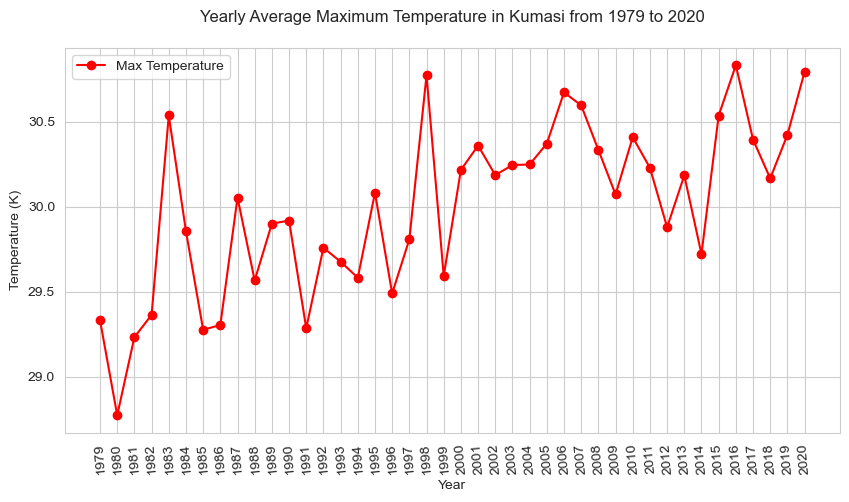

In [47]:
# Plotting the yearly climatological temperature averages for maximum temperature
plt.figure(figsize=(10, 5))
yearly_avg_max_temp.plot(marker='o', color='red')
plt.title('Yearly Average Maximum Temperature in Kumasi from 1979 to 2020\n')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.xticks(yearly_avg_max_temp.year, rotation=95)
plt.legend(['Max Temperature'])
plt.show()

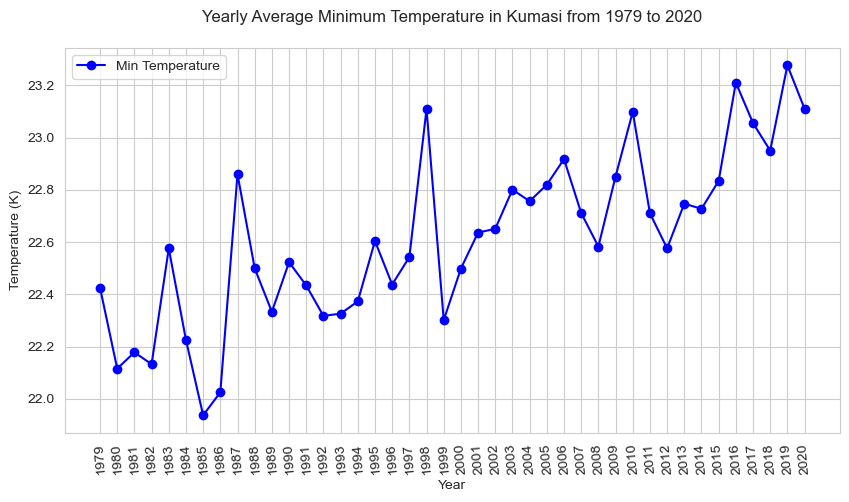

In [48]:
# Plotting the yearly climatological temperature averages for minimum temperature
plt.figure(figsize=(10, 5))
yearly_avg_min_temp.plot(marker='o', color='blue')
plt.title('Yearly Average Minimum Temperature in Kumasi from 1979 to 2020\n')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.xticks(yearly_avg_min_temp.year, rotation=95)
plt.legend(['Min Temperature'])
plt.show()
